In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../Data Cleaning/Data/tags-goodreads-english-popular-quotes.csv')

# Configure pandas to display more rows
pd.set_option('display.max_rows', 20)

# Get a random sample of 20 quotes
random_sample = df.sample(n=20, random_state=42)

# Display the random sample with all rows visible
random_sample

,QUOTE,LIKES,AUTHOR,TITLE,TAGS
263,Were you watching me sleep? Because I thought ...,72,Ilona Andrews,Magic Rises,"['kate-daniels', 'sleep', 'watching-someone-sl..."
14764,And I thought that all those little kids are g...,414,Stephen Chbosky,The Perks of Being a Wallflower,['inspirational']
5100,The Prince found Buttercup waiting unhappily o...,173,William Goldman,The Princess Bride,['love']
20347,Girls aren't very good at keeping maps in thei...,171,C.S. Lewis,The Chronicles of Narnia,[]
14667,"In every end, there is also a beginning.",313,Libba Bray,A Great and Terrible Beauty,['ending']
16030,Science can destroy religion by ignoring it as...,61,Arthur C. Clarke,Childhood's End,['science']
20941,"I give myself very good advice, but I very sel...",301,Lewis Carroll,Alice's Adventures in Wonderland & Through the...,[]
26605,You can forget who you are if you're alone too...,87,Margaret Atwood,The Year of the Flood,[]
1661,The reason Victorian society was so restricted...,65,Connie Willis,To Say Nothing of the Dog,[]
24744,Life is a series of pulls back and forth. You ...,97,Mitch Albom,Tuesdays with Morrie,"['mitch-albom', 'tuesdays-with-morrie']"


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import plotly.express as px
from umap import UMAP

# Load the cleaned dataset
df = pd.read_csv('../Data Cleaning/Data/goodreads-english-popular-quotes.csv')

# Preview the data
print(f"Loaded {len(df)} quotes for topic modeling")
print(f"Sample quotes:")
for i, quote in enumerate(df['QUOTE'].sample(5).values):
    print(f"{i+1}. {quote[:100]}...")

# Create embeddings using a sentence transformer
print("\nInitializing sentence transformer model...")
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight model good for quotes

# Initialize and customize the BERTopic model
# Using parameters appropriate for quote analysis
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
topic_model = BERTopic(
    embedding_model=sentence_model,    # Use the sentence transformer
    umap_model=umap_model,             # Customize UMAP for better topic separation
    min_topic_size=20,                 # Minimum size of topics (can be adjusted)
    nr_topics="auto",                  # Let the model determine optimal number of topics
    verbose=True
)

print("BERTopic model initialized. Ready for training in the next cell.")

Loaded 36802 quotes for topic modeling
Sample quotes:
1. Of course.. some people, me included, believe that punk is just the most recent manifestation of thi...
2. Nothing that we do, is done in vain. I believe, with all my soul, that we shall see triumph....
3. May the hair on your toes never fall out!...
4. Apparently, a woman can only go so long without a sword between her hands....
5. Stop thinking all the time that you're in the way, that you're bothering the person next to you. If ...

Initializing sentence transformer model...


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

BERTopic model initialized. Ready for training in the next cell.


In [12]:
# Preprocessing cell for BERTopic modeling
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))
# Add some additional stopwords that might be common in quotes
additional_stopwords = {'could', 'would', 'should', 'may', 'might', 'must', 'need',
                       'say', 'said', 'says', 'like', 'just', 'im', 'dont', 'thats'}
stop_words.update(additional_stopwords)

# Load the dataset
df = pd.read_csv('../Data Cleaning/Data/goodreads-english-popular-quotes.csv')
print(f"Loaded {len(df)} quotes for preprocessing")

# Enhanced preprocessing function with stopword removal
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters but keep apostrophes for contractions
    text = re.sub(r'[^a-zA-Z0-9\s\']', ' ', text)
    
    # Tokenize text
    words = text.split()
    
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    
    # Join words back together
    text = ' '.join(filtered_words)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to quotes
df['processed_quote'] = df['QUOTE'].apply(preprocess_text)

# Keep the original quote for reference
df['original_quote'] = df['QUOTE']

# Remove very short quotes (less than 4 words after preprocessing)
word_counts = df['processed_quote'].apply(lambda x: len(x.split()))
df = df[word_counts >= 4].reset_index(drop=True)

print(f"After removing very short quotes: {len(df)} quotes remaining")

# Preview processed quotes
print("\nSample of processed quotes:")
for i, (orig, proc) in enumerate(zip(df['QUOTE'].head(3), df['processed_quote'].head(3))):
    print(f"{i+1}. Original: {orig[:100]}...")
    print(f"   Processed: {proc[:100]}...")

print("\nPreprocessing complete. Ready for topic modeling.")

Loaded 36802 quotes for preprocessing
After removing very short quotes: 35159 quotes remaining

Sample of processed quotes:
1. Original: My life amounts to no more than one drop in a limitless ocean. Yet what is any ocean, but a multitud...
   Processed: life amounts one drop limitless ocean yet ocean multitude drops...
2. Original: If you want something you can have it, but only if you want everything that goes with it, including ...
   Processed: want something want everything goes including hard work despair willing risk failure...
3. Original: She wondered whether there would ever come an hour in her life when she didn't think of him -- didn'...
   Processed: wondered whether ever come hour life think speak head relive every moment together long voice hands ...

Preprocessing complete. Ready for topic modeling.


In [14]:
# Import necessary libraries
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from umap import UMAP
import hdbscan
import plotly.express as px
import plotly.graph_objects as go

print("Initializing BERTopic model...")

# Initialize sentence transformer for document embeddings
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# Configure UMAP for dimensionality reduction
umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

# Configure HDBSCAN for clustering
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=15,
    metric='euclidean',
    prediction_data=True
)

# Create BERTopic model with custom parameters
topic_model = BERTopic(
    embedding_model=sentence_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    nr_topics="auto",
    top_n_words=15,
    verbose=True
)

# Use the processed quotes for modeling
docs = df['processed_quote'].tolist()

print(f"Fitting BERTopic model to {len(docs)} quotes...")
topics, probs = topic_model.fit_transform(docs)

# Get topic info
topic_info = topic_model.get_topic_info()
print(f"\nDetected {len(topic_info) - 1} topics (excluding outliers)")
print(topic_info.head(10))

# Save topics to the dataframe - safely handle the probabilities
df['topic'] = topics
# Fix for the dimension error - probs might be 1D or 2D
if len(probs.shape) > 1:
    df['topic_prob'] = np.max(probs, axis=1)
else:
    df['topic_prob'] = probs  # If probs is already 1D

# Visualizations
print("\nGenerating topic visualizations...")

try:
    # Top words per topic visualization
    fig = topic_model.visualize_barchart(top_n_topics=10, n_words=10)
    fig.write_html('../Data Cleaning/Data/topic_words_barchart.html')
    print("Saved top words visualization to 'topic_words_barchart.html'")
    
    # Topic distance map
    fig = topic_model.visualize_topics()
    fig.write_html('../Data Cleaning/Data/topic_distance_map.html')
    print("Saved topic distance map to 'topic_distance_map.html'")
    
    # Topic hierarchy visualization
    fig = topic_model.visualize_hierarchy()
    fig.write_html('../Data Cleaning/Data/topic_hierarchy.html')
    print("Saved topic hierarchy to 'topic_hierarchy.html'")
except Exception as e:
    print(f"Error in visualization: {e}")
    print("Continuing with remaining analysis...")

# Display representative quotes for top 5 topics (if they exist)
print("\nRepresentative quotes from top topics:")

# Get non-outlier topics (topic_id != -1)
non_outlier_topics = [t for t in topic_info['Topic'].values if t != -1][:5]

for i, topic_id in enumerate(non_outlier_topics):
    if topic_id == -1:  # Skip outlier topic
        continue
        
    # Get topic words
    try:
        topic_words = [word for word, _ in topic_model.get_topic(topic_id)[:5]]
        print(f"\nTopic {topic_id}: {', '.join(topic_words)}")
    except:
        print(f"\nTopic {topic_id}: [Error retrieving topic words]")
    
    # Get quotes for this topic
    topic_quotes = df[df['topic'] == topic_id]
    if len(topic_quotes) == 0:
        print("  No quotes found for this topic")
        continue
        
    # Sort by probability if available
    if 'topic_prob' in topic_quotes.columns:
        topic_quotes = topic_quotes.sort_values('topic_prob', ascending=False)
    
    # Display top 2 representative quotes
    for j, (_, row) in enumerate(topic_quotes.head(2).iterrows()):
        print(f"  Quote {j+1}: \"{row['QUOTE'][:150]}{'...' if len(row['QUOTE']) > 150 else ''}\"")
        print(f"  - {row['AUTHOR']}")

# Create a simple interactive function to explore topics
def explore_topic(topic_id, num_quotes=3):
    """Display information and quotes for a specific topic"""
    if topic_id not in df['topic'].values:
        print(f"Topic {topic_id} not found in results")
        return
        
    # Get topic words
    try:
        topic_words = topic_model.get_topic(topic_id)
        word_list = ", ".join([word for word, _ in topic_words[:10]])
        print(f"Topic {topic_id} words: {word_list}")
    except:
        print(f"Topic {topic_id}: [Error retrieving topic words]")
    
    # Get quotes for this topic
    topic_quotes = df[df['topic'] == topic_id]
    print(f"Topic contains {len(topic_quotes)} quotes")
    
    # Sort by probability if available
    if 'topic_prob' in topic_quotes.columns:
        topic_quotes = topic_quotes.sort_values('topic_prob', ascending=False)
    
    # Display representative quotes
    print("\nTop representative quotes:")
    for i, (_, row) in enumerate(topic_quotes.head(num_quotes).iterrows()):
        if i >= num_quotes:
            break
        print(f"\n{i+1}. \"{row['QUOTE'][:200]}{'...' if len(row['QUOTE']) > 200 else ''}\"")
        print(f"   - {row['AUTHOR']}, {row['TITLE']}")

print("\nTo explore any topic in detail, use the explore_topic function:")
print("Example: explore_topic(0, num_quotes=3)")

# Save the topic model and processed dataframe
import pickle
try:
    with open('../Data Cleaning/Data/bertopic_model.pkl', 'wb') as f:
        pickle.dump(topic_model, f)
    df.to_csv('../Data Cleaning/Data/quotes_with_topics.csv', index=False)
    print("\nModel and topic assignments saved to Data folder")
except Exception as e:
    print(f"Error saving model or data: {e}")

print("\nTopic modeling complete!")

Initializing BERTopic model...


2025-05-14 06:54:00,449 - BERTopic - Embedding - Transforming documents to embeddings.


Fitting BERTopic model to 35159 quotes...


Batches:   0%|          | 0/1099 [00:00<?, ?it/s]

2025-05-14 06:54:33,287 - BERTopic - Embedding - Completed ✓
2025-05-14 06:54:33,289 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-14 06:54:55,190 - BERTopic - Dimensionality - Completed ✓
2025-05-14 06:54:55,194 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current p


Detected 19 topics (excluding outliers)
   Topic  Count                             Name  \
0     -1  20085            -1_one_life_love_know   
1      0  13964           0_love_one_know_people   
2      1    164            1_sea_fish_rain_ocean   
3      2    126          2_wine_drink_beer_glass   
4      3    124        3_music_song_songs_people   
5      4     75        4_scars_wounds_scar_wound   
6      5     67         5_rich_money_poor_wealth   
7      6     59  6_fall_mountain_falling_jumping   
8      7     57         7_fire_burn_burning_warm   
9      8     54   8_christmas_santa_grinch_feast   

                                      Representation  \
0  [one, life, love, know, people, time, world, n...   
1  [love, one, know, people, never, think, time, ...   
2  [sea, fish, rain, ocean, water, drown, swim, w...   
3  [wine, drink, beer, glass, drunk, drinking, te...   
4  [music, song, songs, people, play, one, heard,...   
5  [scars, wounds, scar, wound, heal, skin, leave.

In [15]:
# Advanced Sentiment Analysis for Literary Quotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from tqdm.auto import tqdm
import torch
import warnings
warnings.filterwarnings('ignore')

print("Loading quote dataset...")
# Load the dataset with topic assignments
df = pd.read_csv('../Data Cleaning/Data/quotes_with_topics.csv')
print(f"Loaded {len(df)} quotes with {df['topic'].nunique()} topics")

# Check if CUDA is available for faster processing
device = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'CUDA' if device==0 else 'CPU'}")

# Initialize advanced sentiment analysis models
print("Loading sentiment analysis models...")

# 1. General sentiment model (more accurate than VADER for literary text)
sentiment_classifier = pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=device
)

# 2. Emotion detection model (captures emotional dimensions beyond positive/negative)
emotion_classifier = pipeline(
    "text-classification", 
    model="joeddav/distilbert-base-uncased-go-emotions-student",
    device=device
)

# Process quotes in smaller batches to avoid memory issues
def analyze_sentiments(texts, batch_size=32):
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing sentiment"):
        batch = texts[i:i+batch_size]
        # Handle empty strings or very short quotes
        batch = [text if isinstance(text, str) and len(text.strip()) > 10 
                else "neutral text" for text in batch]
        # Truncate long texts to avoid issues (512 tokens limit for BERT models)
        batch = [text[:1000] for text in batch]
        batch_results = sentiment_classifier(batch)
        results.extend(batch_results)
    return results

def analyze_emotions(texts, batch_size=32):
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing emotions"):
        batch = texts[i:i+batch_size]
        # Handle empty strings or very short quotes
        batch = [text if isinstance(text, str) and len(text.strip()) > 10 
                else "neutral text" for text in batch]
        # Truncate long texts to avoid issues
        batch = [text[:1000] for text in batch]
        batch_results = emotion_classifier(batch)
        results.extend(batch_results)
    return results

# Sample the dataset if it's very large to make processing faster
if len(df) > 1000:
    print(f"Using a sample of 1000 quotes for detailed sentiment analysis")
    sample_df = df.sample(1000, random_state=42)
else:
    sample_df = df.copy()

# Perform sentiment analysis
print("\nRunning advanced sentiment analysis...")
sentiment_results = analyze_sentiments(sample_df['QUOTE'].tolist())

# Extract sentiment values
sample_df['sentiment_label'] = [r['label'] for r in sentiment_results]
sample_df['sentiment_score'] = [r['score'] for r in sentiment_results]
# Convert 'POSITIVE'/'NEGATIVE' to numeric scores from -1 to 1
sample_df['sentiment_value'] = sample_df.apply(
    lambda x: x['sentiment_score'] if x['sentiment_label'] == 'POSITIVE' 
    else -x['sentiment_score'], 
    axis=1
)

# Perform emotion analysis
print("\nRunning emotion analysis...")
emotion_results = analyze_emotions(sample_df['QUOTE'].tolist())

# Extract primary emotion
sample_df['primary_emotion'] = [r['label'] for r in emotion_results]
sample_df['emotion_score'] = [r['score'] for r in emotion_results]

# Extract topic information
topic_info = {}
top_emotions_by_topic = {}

print("\nAnalyzing sentiment patterns by topic...")
for topic in sample_df['topic'].unique():
    topic_quotes = sample_df[sample_df['topic'] == topic]
    
    # Get sentiment distribution
    sentiment_distribution = topic_quotes['sentiment_label'].value_counts(normalize=True)
    avg_sentiment = topic_quotes['sentiment_value'].mean()
    
    # Get emotion distribution
    emotion_distribution = topic_quotes['primary_emotion'].value_counts(normalize=True)
    top_emotions = emotion_distribution.nlargest(3).index.tolist()
    
    # Store information
    topic_info[topic] = {
        'avg_sentiment': avg_sentiment,
        'positive_pct': sentiment_distribution.get('POSITIVE', 0) * 100,
        'negative_pct': sentiment_distribution.get('NEGATIVE', 0) * 100,
        'top_emotions': top_emotions,
        'count': len(topic_quotes)
    }
    
    # Store top emotions by topic for visualization
    top_emotions_by_topic[topic] = emotion_distribution.nlargest(3).to_dict()

# Create a nice topic name mapping for better visualization
try:
    topic_model = pd.read_pickle('../Data Cleaning/Data/bertopic_model.pkl')
    topic_names = {}
    for topic in sample_df['topic'].unique():
        if topic == -1:
            topic_names[topic] = "Miscellaneous"
        else:
            try:
                top_words = topic_model.get_topic(topic)[:3]
                topic_name = f"T{topic}: {', '.join([word for word, _ in top_words])}"
                topic_names[topic] = topic_name
            except:
                topic_names[topic] = f"Topic {topic}"
except:
    # Fallback if topic model isn't available
    topic_names = {topic: f"Topic {topic}" for topic in sample_df['topic'].unique()}

# VISUALIZATIONS
print("\nCreating sentiment visualizations...")

# 1. Average sentiment by topic
plt.figure(figsize=(14, 8))
topic_sentiment = {topic: info['avg_sentiment'] for topic, info in topic_info.items()}
# Sort topics by sentiment
sorted_topics = sorted(topic_sentiment.items(), key=lambda x: x[1], reverse=True)
topics = [t[0] for t in sorted_topics]
sentiments = [t[1] for t in sorted_topics]

# Create bar chart
plt.bar(
    range(len(topics)), 
    sentiments,
    color=[plt.cm.RdYlGn(0.5 + s/2) for s in sentiments]  # Colormap from red (negative) to green (positive)
)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xticks(range(len(topics)), [topic_names[t] for t in topics], rotation=45, ha='right')
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Average Sentiment (-1 to 1)', fontsize=14)
plt.title('Average Sentiment by Topic', fontsize=16)
plt.tight_layout()
plt.savefig('../Data Cleaning/Data/sentiment_by_topic.png')
plt.close()

# 2. Emotion distribution across all quotes
plt.figure(figsize=(14, 8))
emotion_counts = sample_df['primary_emotion'].value_counts()
emotion_counts = emotion_counts[emotion_counts > len(sample_df) * 0.01]  # Filter minor emotions
emotion_counts = emotion_counts.sort_values(ascending=False)

sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Primary Emotions Across Quotes', fontsize=16)
plt.tight_layout()
plt.savefig('../Data Cleaning/Data/emotion_distribution.png')
plt.close()

# 3. Top 3 emotions by topic
plt.figure(figsize=(16, 10))
topics_to_plot = [t for t in topics if topic_info[t]['count'] >= 20][:8]  # Top 8 topics with enough quotes

data = []
emotions = []
for topic in topics_to_plot:
    for emotion, value in top_emotions_by_topic[topic].items():
        data.append({
            'Topic': topic_names[topic],
            'Emotion': emotion,
            'Percentage': value * 100
        })
        emotions.append(emotion)

# Create dataframe for plotting
plot_df = pd.DataFrame(data)
emotions = list(set(emotions))

ax = sns.barplot(x='Topic', y='Percentage', hue='Emotion', data=plot_df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Top Emotions by Topic', fontsize=16)
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../Data Cleaning/Data/emotions_by_topic.png')
plt.close()

# 4. Sentiment boxplot by topic
plt.figure(figsize=(14, 8))
topic_order = [t for t, _ in sorted_topics]
boxplot_data = []
for topic in topic_order:
    topic_values = sample_df[sample_df['topic'] == topic]['sentiment_value'].tolist()
    if topic_values:  # Only include if there are values
        boxplot_data.append(topic_values)

plt.boxplot(boxplot_data, labels=[topic_names[t] for t in topic_order])
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Sentiment Value', fontsize=14)
plt.title('Sentiment Distribution by Topic', fontsize=16)
plt.tight_layout()
plt.savefig('../Data Cleaning/Data/sentiment_boxplot.png')
plt.close()

# Save results to CSV
sample_df.to_csv('../Data Cleaning/Data/quotes_with_sentiment.csv', index=False)

# Print summary of sentiment analysis
print("\nSentiment Analysis Summary:")
print(f"Overall sentiment: {sample_df['sentiment_value'].mean():.3f} (avg value from -1 to 1)")
print(f"Positive quotes: {(sample_df['sentiment_label'] == 'POSITIVE').mean()*100:.1f}%")
print(f"Negative quotes: {(sample_df['sentiment_label'] == 'NEGATIVE').mean()*100:.1f}%")

print("\nTop 5 most positive topics:")
for i, (topic, _) in enumerate(sorted_topics[:5]):
    info = topic_info[topic]
    print(f"{i+1}. {topic_names[topic]}: {info['avg_sentiment']:.3f} ({info['positive_pct']:.1f}% positive)")

print("\nTop 5 most negative topics:")
for i, (topic, _) in enumerate(sorted_topics[-5:]):
    info = topic_info[topic]
    print(f"{i+1}. {topic_names[topic]}: {info['avg_sentiment']:.3f} ({info['negative_pct']:.1f}% negative)")

print("\nMost common emotions:")
for emotion, count in sample_df['primary_emotion'].value_counts().head(5).items():
    print(f"- {emotion}: {count} quotes ({count/len(sample_df)*100:.1f}%)")

print("\nAll sentiment visualizations saved to Data Cleaning/Data directory")

Loading quote dataset...
Loaded 35159 quotes with 20 topics
Using device: CPU
Loading sentiment analysis models...


Device set to use cpu


config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Using a sample of 1000 quotes for detailed sentiment analysis

Running advanced sentiment analysis...


Analyzing sentiment:   0%|          | 0/32 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]


Running emotion analysis...


Analyzing emotions:   0%|          | 0/32 [00:00<?, ?it/s]


Analyzing sentiment patterns by topic...

Creating sentiment visualizations...

Sentiment Analysis Summary:
Overall sentiment: 0.011 (avg value from -1 to 1)
Positive quotes: 50.4%
Negative quotes: 49.6%

Top 5 most positive topics:
1. T11: breathe, air, breathing: 1.000 (100.0% positive)
2. T18: gift, gifts, given: 0.999 (100.0% positive)
3. T16: summer, autumn, spring: 0.999 (100.0% positive)
4. T5: rich, money, poor: 0.991 (100.0% positive)
5. T13: wolf, lion, sheep: 0.983 (100.0% positive)

Top 5 most negative topics:
1. Miscellaneous: -0.041 (52.6% negative)
2. T8: christmas, santa, grinch: -0.717 (100.0% negative)
3. T15: tree, trees, lorax: -0.986 (100.0% negative)
4. T7: fire, burn, burning: -0.994 (100.0% negative)
5. T17: steal, thief, stole: -0.998 (100.0% negative)

Most common emotions:
- confusion: 178 quotes (17.8%)
- realization: 146 quotes (14.6%)
- caring: 83 quotes (8.3%)
- desire: 81 quotes (8.1%)
- sadness: 71 quotes (7.1%)

All sentiment visualizations saved to D

Loading sentiment data...
Loaded 1000 quotes with sentiment information
Using device: cpu
Loading GPT-2 language model for perplexity calculation...

Calculating perplexity scores...


Calculating perplexity:   0%|          | 0/200 [00:00<?, ?it/s]

Creating derived perplexity metrics...

Creating perplexity visualizations...


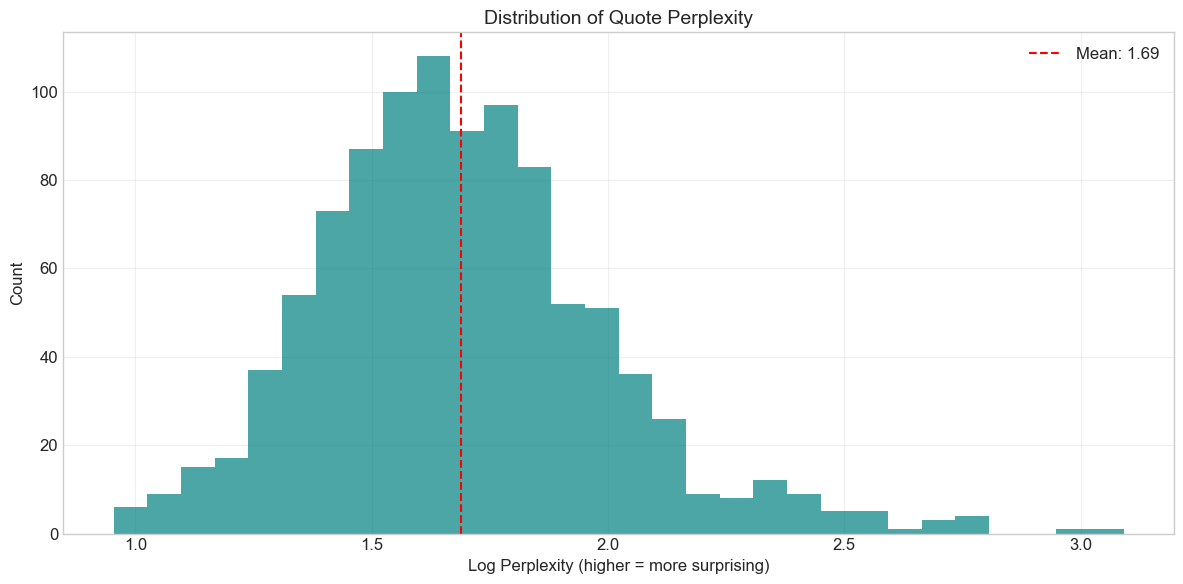

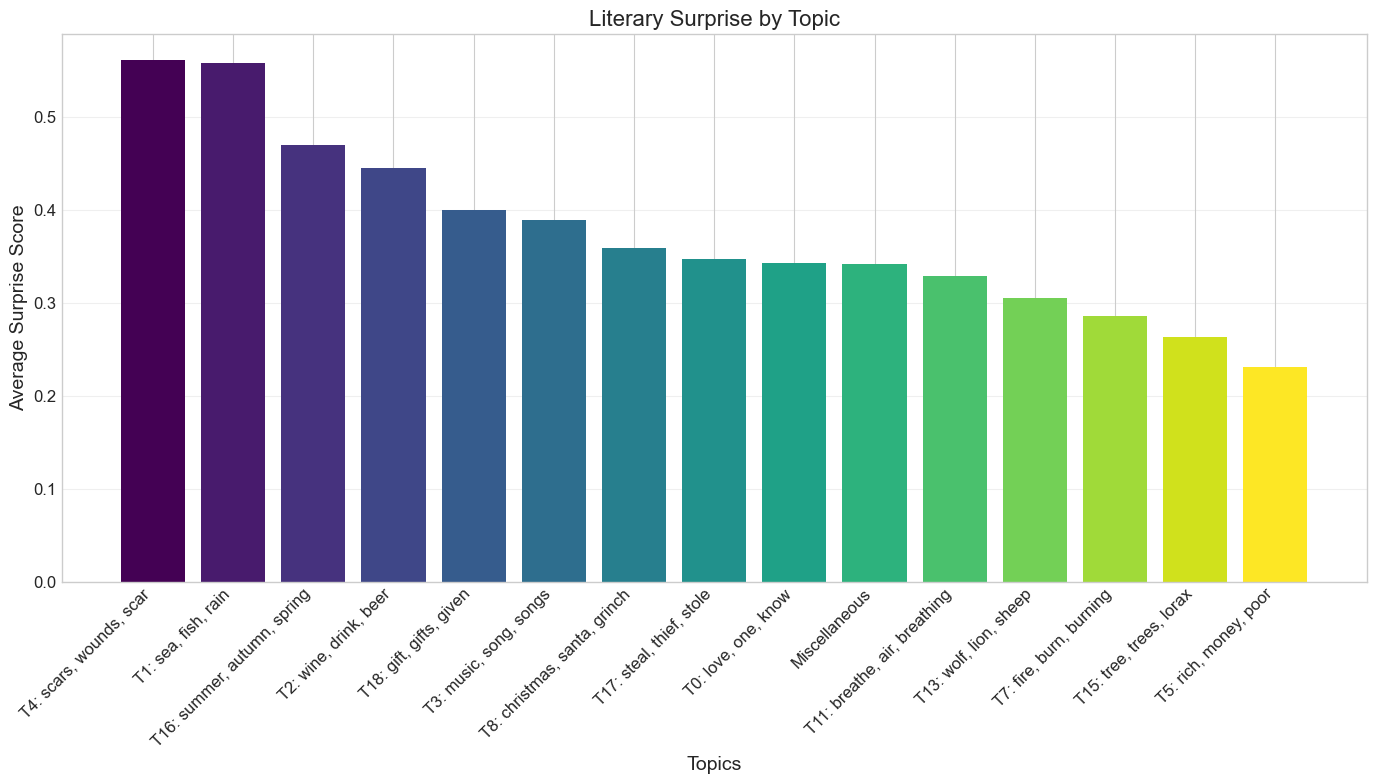

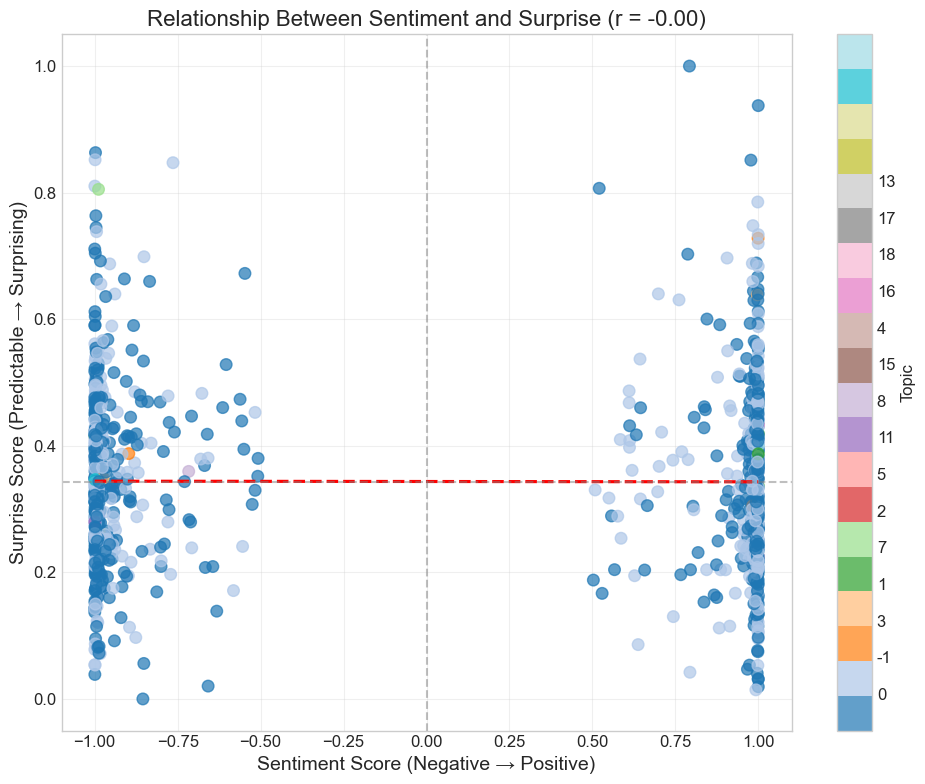

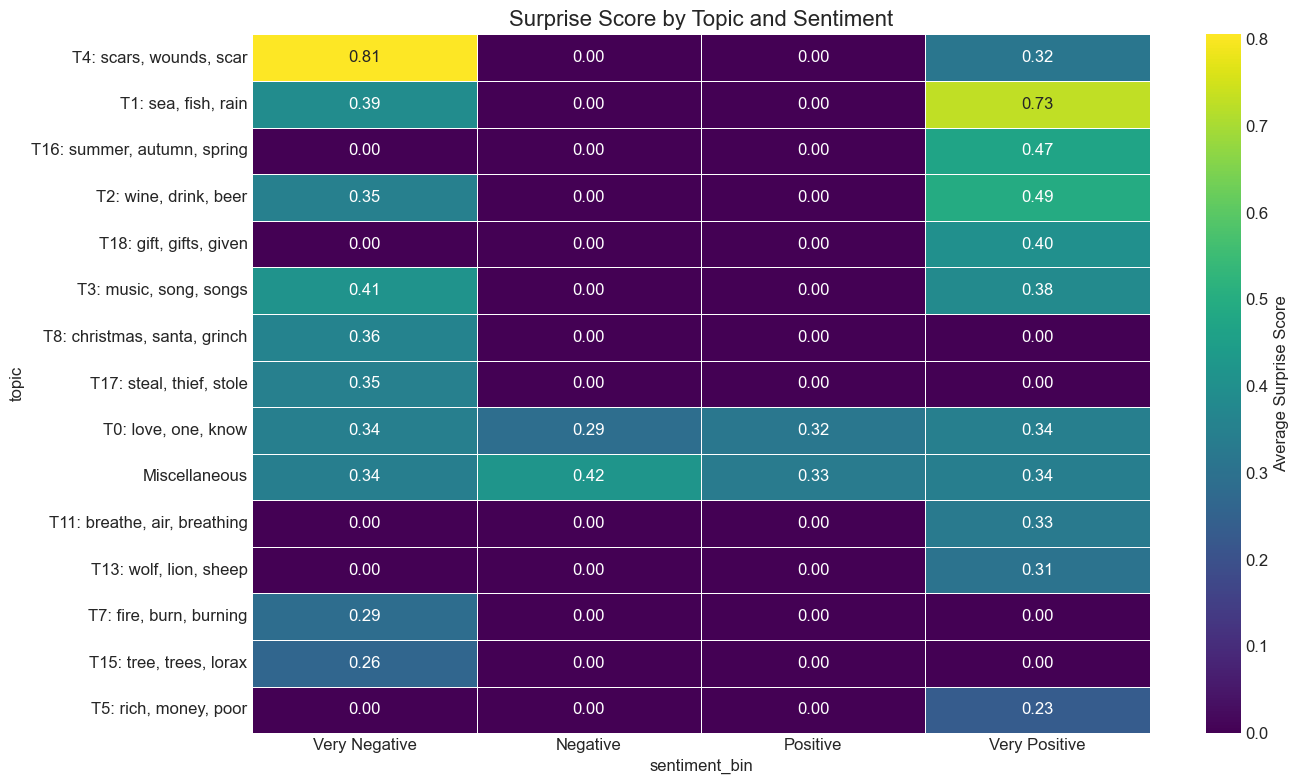


Most surprising quotes by topic:

Topic: T0: love, one, know
1. "Was not writing poetry a secret transaction, a voice answering a voice?" (Surprise: 0.85)
   - Virginia Woolf
2. "Every intimacy carries secreted somewhere below its initial lovely surfaces, the ever-coiled maki..." (Surprise: 0.85)
   - Elizabeth Gilbert
3. "Lying on stained, wretched sheets with a bleeding virgin
We could plan a murder
Or start a religion." (Surprise: 0.81)
   - Jim Morrison

Topic: Miscellaneous
1. "Lothaire, I’ve met dirt younger than we
are.” -Nix" (Surprise: 1.00)
   - Kresley Cole
2. "Every movement reveals us." (Surprise: 0.94)
   - Michel de Montaigne
3. "Esme Weatherwax hadn't done nice. She'd done what was 
." (Surprise: 0.86)
   - Terry Pratchett

Topic: T3: music, song, songs
1. "And don’t worry about the bits you can’t understand. Sit back and allow the words to wash around ..." (Surprise: 0.42)
   - Roald Dahl
2. "Without music, life would be a mistake." (Surprise: 0.41)
   - Friedrich Nie

In [16]:
# Imports, calculation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')
import os

# Display settings
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12})

print("Loading sentiment data...")
# Load the dataset with sentiment information
input_path = '../Data Cleaning/Data/quotes_with_sentiment.csv'
output_path = '../Data Cleaning/Data/topic-sentiment-perplexity.csv'

try:
    df = pd.read_csv(input_path)
    print(f"Loaded {len(df)} quotes with sentiment information")
except FileNotFoundError:
    df = pd.read_csv('../Data Cleaning/Data/quotes_with_topics.csv')
    print(f"Sentiment data not found, loaded {len(df)} quotes with topic information only")

# Sample if dataset is too large for perplexity calculation
if len(df) > 1000:
    print(f"Using a sample of 1000 quotes for perplexity analysis")
    if 'sentiment_value' in df.columns:
        # Stratified sampling by topic and sentiment
        sample_df = df.groupby('topic', group_keys=False).apply(
            lambda x: x.sample(min(len(x), int(1000*len(x)/len(df))), random_state=42)
        )
    else:
        # Simple sampling by topic
        sample_df = df.sample(1000, random_state=42)
else:
    sample_df = df.copy()

# Check if CUDA is available for faster processing
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Initialize GPT-2 model for perplexity calculation
print("Loading GPT-2 language model for perplexity calculation...")
model_id = "gpt2"  # Using the base GPT-2 model for efficiency
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)
model.eval()  # Set to evaluation mode

# Helper functions for perplexity calculation
def calculate_perplexity(text, max_length=512):
    """Calculate perplexity of text using GPT-2 model"""
    if not isinstance(text, str) or len(text.strip()) < 10:
        return float('nan')
    
    # Truncate text to avoid GPU memory issues
    text = text[:max_length]
    
    # Encode text
    encodings = tokenizer(text, return_tensors="pt").to(device)
    
    # Calculate perplexity using auto-regressive language modeling
    with torch.no_grad():
        # Get model output
        outputs = model(**encodings)
        logits = outputs.logits
        
        # Shift logits and labels for next token prediction
        shift_logits = logits[:, :-1, :].contiguous()
        shift_labels = encodings.input_ids[:, 1:].contiguous()
        
        # Calculate loss
        loss_fct = torch.nn.CrossEntropyLoss()
        loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        
        # Calculate perplexity from loss
        perplexity = torch.exp(loss).item()
    
    return perplexity

def calculate_perplexities(texts, batch_size=5):
    """Calculate perplexity for a list of texts"""
    perplexities = []
    
    for i in tqdm(range(0, len(texts), batch_size), desc="Calculating perplexity"):
        batch = texts[i:i+batch_size]
        batch_perplexities = [calculate_perplexity(text) for text in batch]
        perplexities.extend(batch_perplexities)
    
    return perplexities

# Calculate perplexity for all quotes
print("\nCalculating perplexity scores...")
sample_df['perplexity'] = calculate_perplexities(sample_df['QUOTE'].tolist())

# Process perplexity data for analysis
print("Creating derived perplexity metrics...")

# Log transform perplexity (for better distribution visualization)
sample_df['log_perplexity'] = np.log10(sample_df['perplexity'])

# Normalize to 0-1 scale for a 'surprise score' (1 = most surprising/unpredictable)
valid_perplexities = sample_df['log_perplexity'].dropna()
min_log_perp = valid_perplexities.min()
max_log_perp = valid_perplexities.max()
sample_df['surprise_score'] = (sample_df['log_perplexity'] - min_log_perp) / (max_log_perp - min_log_perp)

# Create topic name mapping if possible
try:
    topic_model = pd.read_pickle('../Data Cleaning/Data/bertopic_model.pkl')
    topic_names = {}
    for topic in sample_df['topic'].unique():
        if topic == -1:
            topic_names[topic] = "Miscellaneous"
        else:
            try:
                top_words = topic_model.get_topic(topic)[:3]
                topic_name = f"T{topic}: {', '.join([word for word, _ in top_words])}"
                topic_names[topic] = topic_name
            except:
                topic_names[topic] = f"Topic {topic}"
except:
    # Fallback if topic model isn't available
    topic_names = {topic: f"Topic {topic}" for topic in sample_df['topic'].unique()}

# VISUALIZATIONS
print("\nCreating perplexity visualizations...")

# 1. Perplexity distribution
plt.figure(figsize=(12, 6))
plt.hist(sample_df['log_perplexity'].dropna(), bins=30, alpha=0.7, color='teal')
plt.xlabel('Log Perplexity (higher = more surprising)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Quote Perplexity', fontsize=14)
plt.axvline(x=sample_df['log_perplexity'].mean(), color='red', linestyle='--', label=f'Mean: {sample_df["log_perplexity"].mean():.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
# Save figure
plt.savefig('../Data Cleaning/Data/perplexity_distribution.png')
plt.show()

# 2. Average perplexity/surprise by topic
plt.figure(figsize=(14, 8))
topic_perplexity = sample_df.groupby('topic')['surprise_score'].mean().sort_values(ascending=False)
topics = topic_perplexity.index

# Create bar chart
colors = plt.cm.viridis(np.linspace(0, 1, len(topics)))
plt.bar(range(len(topics)), topic_perplexity.values, color=colors)
plt.xticks(range(len(topics)), [topic_names[t] for t in topics], rotation=45, ha='right')
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Average Surprise Score', fontsize=14)
plt.title('Literary Surprise by Topic', fontsize=16)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
# Save figure
plt.savefig('../Data Cleaning/Data/surprise_by_topic.png')
plt.show()

# 3. Surprise vs Sentiment scatter plot (if sentiment data available)
if 'sentiment_value' in sample_df.columns:
    plt.figure(figsize=(10, 8))
    # Create scatter plot
    scatter = plt.scatter(
        sample_df['sentiment_value'], 
        sample_df['surprise_score'],
        c=sample_df['topic'],
        cmap='tab20',
        alpha=0.7,
        s=70
    )
    
    # Add regression line
    sns.regplot(
        x='sentiment_value', 
        y='surprise_score', 
        data=sample_df,
        scatter=False, 
        ci=None, 
        color='red',
        line_kws={"linestyle": "--"}
    )
    
    # Calculate correlation
    corr = sample_df['sentiment_value'].corr(sample_df['surprise_score'])
    
    # Add reference lines and labels
    plt.axhline(y=sample_df['surprise_score'].mean(), color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    
    plt.xlabel('Sentiment Score (Negative → Positive)', fontsize=14)
    plt.ylabel('Surprise Score (Predictable → Surprising)', fontsize=14)
    plt.title(f'Relationship Between Sentiment and Surprise (r = {corr:.2f})', fontsize=16)
    plt.grid(alpha=0.3)
    
    # Add colorbar legend for topics
    cbar = plt.colorbar(scatter, ticks=np.arange(len(topic_names)))
    cbar.set_label('Topic')
    cbar.set_ticklabels([f"{topic}" for topic in topic_names.keys()])
    
    plt.tight_layout()
    # Save figure
    plt.savefig('../Data Cleaning/Data/sentiment_vs_surprise.png')
    plt.show()
    
    # 4. Heatmap: Average surprise by topic and sentiment bins
    plt.figure(figsize=(14, 8))
    
    # Create sentiment bins
    sample_df['sentiment_bin'] = pd.cut(
        sample_df['sentiment_value'], 
        bins=5, 
        labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
    )
    
    # Create pivot table
    pivot = sample_df.pivot_table(
        values='surprise_score', 
        index='topic', 
        columns='sentiment_bin',
        aggfunc='mean'
    ).fillna(0)
    
    # Sort rows by average surprise
    pivot = pivot.loc[topic_perplexity.index]
    
    # Create heatmap
    sns.heatmap(
        pivot, 
        annot=True, 
        cmap='viridis', 
        fmt='.2f',
        linewidths=.5,
        cbar_kws={'label': 'Average Surprise Score'}
    )
    
    plt.title('Surprise Score by Topic and Sentiment', fontsize=16)
    plt.yticks(np.arange(len(pivot.index)) + 0.5, [topic_names[t] for t in pivot.index], rotation=0)
    plt.tight_layout()
    # Save figure
    plt.savefig('../Data Cleaning/Data/surprise_sentiment_heatmap.png')
    plt.show()

# 5. Top most surprising quotes by topic
top_n = 3
surprising_quotes = {}

print("\nMost surprising quotes by topic:")
for topic in sample_df['topic'].unique():
    topic_quotes = sample_df[sample_df['topic'] == topic].nlargest(top_n, 'surprise_score')
    surprising_quotes[topic] = topic_quotes
    
    print(f"\nTopic: {topic_names[topic]}")
    for i, (_, quote) in enumerate(topic_quotes.iterrows()):
        # Format and truncate quote text
        quote_text = quote['QUOTE']
        if len(quote_text) > 100:
            quote_text = quote_text[:97] + "..."
            
        # Print quote information
        print(f"{i+1}. \"{quote_text}\" (Surprise: {quote['surprise_score']:.2f})")
        print(f"   - {quote['AUTHOR']}")

# Save the dataframe with perplexity metrics
sample_df.to_csv(output_path, index=False)
print(f"\nSaved perplexity data to: {output_path}")

# Print summary statistics
print("\nPerplexity Analysis Summary:")
print(f"Average perplexity: {sample_df['perplexity'].mean():.2f}")
print(f"Most surprising topics:")
for topic, score in topic_perplexity.head(3).items():
    print(f"- {topic_names[topic]}: {score:.3f}")

if 'sentiment_value' in sample_df.columns:
    # Calculate correlation between perplexity and sentiment
    corr = sample_df['surprise_score'].corr(sample_df['sentiment_value'])
    print(f"\nCorrelation between surprise and sentiment: {corr:.3f}")
    
    interpretation = "positive" if corr > 0.1 else "negative" if corr < -0.1 else "no significant"
    print(f"This indicates a {interpretation} relationship between surprising quotes and positive sentiment")

print("\nPerplexity analysis complete!")